In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from pycaret.classification import *
from xgboost import XGBClassifier



In [2]:
df = pd.read_csv("data_with_junk_food_liquid - NVA.csv")
df_numeric = df.drop(
    columns=[
        "Food code",
        "Main food description",
        "WWEIA Category description",
        "WWEIA Category number",
        "Is Liquid",
    ]
)

# drop all rows with inf values
df_numeric = df_numeric.replace([np.inf, -np.inf], np.nan).dropna()

# removing all non-scaled nutrients to ensure no impact to the model through double counting
X = df_numeric.drop(
    columns=[
        "Junk Food",
        "NRF9.3",
        "Sodium (mg)",
        "Protein (g)",
        "Fiber, total dietary (g)",
        "Vitamin A, RAE (mcg_RAE)",
        "Vitamin C (mg)",
        "Vitamin E (alpha-tocopherol) (mg)",
        "Calcium (mg)",
        "Iron\n(mg)",
        "Magnesium (mg)",
        "Potassium (mg)",
        "Fatty acids, total saturated (g)",
        "Sugars, total\n(g)",
    ]
)
y = df_numeric["Junk Food"]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Using Pycaret to determine the best model

In [4]:
# Explore different models using pycaret

clf_setup = setup(
    data=df_numeric,
    target="Junk Food",
    ignore_features=[
        "Food code",
        "Main food description",
        "WWEIA Category number",
        "WWEIA Category description",
        "NRF9.3 Score",  # these columns represent data leakage
        "NR9 Score",
        "LIM3 Score",
        "NRF9.3",
        # "Protein (g)_per_100kcal",
        # "Fiber, total dietary (g)_per_100kcal",
        # "Vitamin A, RAE (mcg_RAE)_per_100kcal",
        # "Vitamin C (mg)_per_100kcal",
        # "Vitamin E (alpha-tocopherol) (mg)_per_100kcal",
        # "Calcium (mg)_per_100kcal",
        # "Iron\n(mg)_per_100kcal",
        # "Magnesium (mg)_per_100kcal",
        # "Potassium (mg)_per_100kcal",
        # "Fatty acids, total saturated (g)_per_100kcal",
        # "Sugars, total\n(g)_per_100kcal",
        # "Sodium (mg)_per_100kcal",
        # "Protein (g)",
        # "Fiber",
        # "Vitamin A, RAE (mcg_RAE)",
        # "Vitamin C (mg)",
        # "Vitamin E (alpha-tocopherol) (mg)l",
        # "Calcium (mg)",
        # "Iron\n(mg)",
        # "Magnesium (mg)",
        # "Potassium (mg)",
        # "Fatty acids, total saturated (g)",
        # "Sugars, total\n(g)",
        # "Sodium (mg)",
    ],
    numeric_features=[
        "Energy (kcal)",
        # "Protein (g)",  # beneficial
        "Carbohydrate (g)",
        # "Sugars, total\n(g)",  # limiting
        # "Fiber, total dietary (g)",  # beneficial
        "Total Fat (g)",
        # "Fatty acids, total saturated (g)",  # limiting
        "Fatty acids, total monounsaturated (g)",
        "Fatty acids, total polyunsaturated (g)",
        "Cholesterol (mg)",
        "Retinol (mcg)",
        # "Vitamin A, RAE (mcg_RAE)",  # beneficial
        "Carotene, alpha (mcg)",
        "Carotene, beta (mcg)",
        "Cryptoxanthin, beta (mcg)",
        "Lycopene (mcg)",
        "Lutein + zeaxanthin (mcg)",
        "Thiamin (mg)",
        "Riboflavin (mg)",
        "Niacin (mg)",
        "Vitamin B-6 (mg)",
        "Folic acid (mcg)",
        "Folate, food (mcg)",
        "Folate, DFE (mcg_DFE)",
        "Folate, total (mcg)",
        "Choline, total (mg)",
        "Vitamin B-12 (mcg)",
        "Vitamin B-12, added\n(mcg)",
        # "Vitamin C (mg)",  # beneficial
        "Vitamin D (D2 + D3) (mcg)",
        # "Vitamin E (alpha-tocopherol) (mg)",  # beneficial
        "Vitamin E, added\n(mg)",
        "Vitamin K (phylloquinone) (mcg)",
        # "Calcium (mg)",  # beneficial
        "Phosphorus (mg)",
        # "Magnesium (mg)",  # beneficial
        # "Iron\n(mg)",  # beneficial
        "Zinc\n(mg)",
        "Copper (mg)",
        "Selenium (mcg)",
        # "Potassium (mg)",  # beneficial
        # "Sodium (mg)",  # limiting
        "Caffeine (mg)",
        "Theobromine (mg)",
        "Alcohol (g)",
        "Water\n(g)",
        # "Is Liquid",
        "Protein (g)_per_100kcal",
        "Fiber, total dietary (g)_per_100kcal",
        "Vitamin A, RAE (mcg_RAE)_per_100kcal",
        "Vitamin C (mg)_per_100kcal",
        "Vitamin E (alpha-tocopherol) (mg)_per_100kcal",
        "Calcium (mg)_per_100kcal",
        "Iron\n(mg)_per_100kcal",
        "Magnesium (mg)_per_100kcal",
        "Potassium (mg)_per_100kcal",
        "Fatty acids, total saturated (g)_per_100kcal",
        "Sugars, total\n(g)_per_100kcal",
        "Sodium (mg)_per_100kcal",
    ],
    fold=5,
    preprocess=False,
    session_id=42,
)  # 'NRF9.3 Score'],)

# Compare models to find the best one
best_model = compare_models(fold=5)

# Print the best model
print(best_model)

,Description,Value
0,Session id,42
1,Target,Junk Food
2,Target type,Binary
3,Original data shape,"(933, 79)"
4,Transformed data shape,"(933, 78)"
5,Transformed train set shape,"(653, 78)"
6,Transformed test set shape,"(280, 78)"
7,Ignore features,8
8,Numeric features,46


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9816,0.9933,0.9761,0.9538,0.9647,0.9523,0.9525,0.4960
xgboost,Extreme Gradient Boosting,0.9571,0.9919,0.8920,0.9386,0.9133,0.8849,0.8866,0.0320
gbc,Gradient Boosting Classifier,0.9495,0.9866,0.8977,0.9102,0.9013,0.8674,0.8697,0.1080
et,Extra Trees Classifier,0.9495,0.9890,0.8793,0.9227,0.8990,0.8654,0.8671,0.0380
rf,Random Forest Classifier,0.9479,0.9888,0.8793,0.9174,0.8955,0.8609,0.8632,0.0400
ada,Ada Boost Classifier,0.9464,0.9713,0.8975,0.8937,0.8945,0.8587,0.8596,0.0380
svm,SVM - Linear Kernel,0.9265,0.9398,0.8848,0.8559,0.8568,0.8081,0.8197,0.0080
lda,Linear Discriminant Analysis,0.9265,0.9636,0.7838,0.9153,0.8437,0.7962,0.8008,0.0080
ridge,Ridge Classifier,0.9234,0.9713,0.7537,0.9329,0.8322,0.7835,0.7921,0.0080
knn,K Neighbors Classifier,0.9219,0.9557,0.8549,0.8445,0.8469,0.7946,0.7970,0.1640


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [5]:
cv_results = pull()
cv_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9816,0.9933,0.9761,0.9538,0.9647,0.9523,0.9525,0.496
xgboost,Extreme Gradient Boosting,0.9571,0.9919,0.8920,0.9386,0.9133,0.8849,0.8866,0.032
gbc,Gradient Boosting Classifier,0.9495,0.9866,0.8977,0.9102,0.9013,0.8674,0.8697,0.108
et,Extra Trees Classifier,0.9495,0.9890,0.8793,0.9227,0.8990,0.8654,0.8671,0.038
rf,Random Forest Classifier,0.9479,0.9888,0.8793,0.9174,0.8955,0.8609,0.8632,0.040
ada,Ada Boost Classifier,0.9464,0.9713,0.8975,0.8937,0.8945,0.8587,0.8596,0.038
svm,SVM - Linear Kernel,0.9265,0.9398,0.8848,0.8559,0.8568,0.8081,0.8197,0.008
lda,Linear Discriminant Analysis,0.9265,0.9636,0.7838,0.9153,0.8437,0.7962,0.8008,0.008
ridge,Ridge Classifier,0.9234,0.9713,0.7537,0.9329,0.8322,0.7835,0.7921,0.008
knn,K Neighbors Classifier,0.9219,0.9557,0.8549,0.8445,0.8469,0.7946,0.7970,0.164


In [6]:
k_5_fold = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGB": XGBClassifier(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=k_5_fold, scoring='accuracy')
#     results.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1})
    results.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1, "Mean Accuracy":cv_scores.mean()
                    , "Std":cv_scores.std()})

results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print(results_df)

                    Model  Accuracy  F1 Score  Mean Accuracy       Std
5                     XGB  0.941176  0.940645       0.963803  0.012458
1       Gradient Boosting  0.935829  0.935829       0.955758  0.009128
3  Support Vector Machine  0.935829  0.934606       0.932975  0.008491
0           Random Forest  0.930481  0.929397       0.946425  0.018291
2     Logistic Regression  0.930481  0.928908       0.937029  0.015475
4     K-Nearest Neighbors  0.882353  0.881657       0.898174  0.021051


Running for XGB Classifier

In [17]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

y_pred = xgb_model.predict(X_test_scaled)

# 5-fold cross-validation
cv_scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")

Cross-validation accuracy scores: [0.97333333 0.93288591 0.95973154 0.97315436 0.95973154]
Mean accuracy: 0.9598
Standard deviation: 0.0147


In [18]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(report)

Accuracy: 0.9412
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       134
           1       0.92      0.87      0.89        53

    accuracy                           0.94       187
   macro avg       0.93      0.92      0.93       187
weighted avg       0.94      0.94      0.94       187



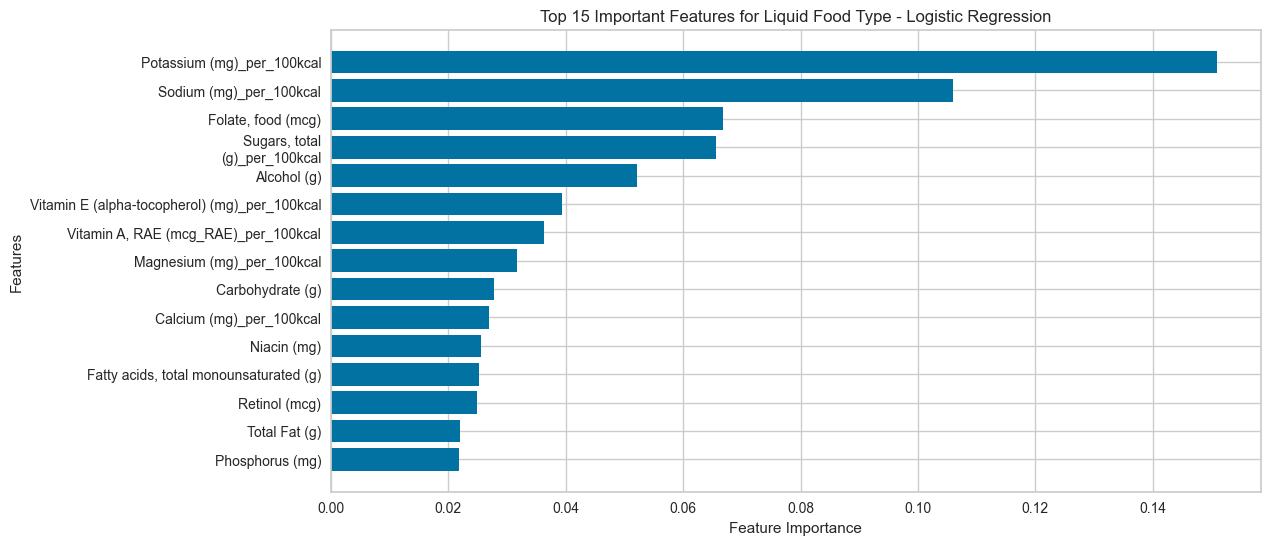

In [19]:
# Feature importance
# feature_importance = xgb_model.coef_[0]
feature_importance = xgb_model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(feat_imp_df['Feature'][:15], feat_imp_df['Importance'][:15])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 15 Important Features for Liquid Food Type - Logistic Regression")
plt.gca().invert_yaxis()
plt.show()

In [20]:
# Ablation Study
ablation_results = []
sorted_features = feat_imp_df['Feature'].tolist()[::-1]
X_train_ablate = X_train_scaled.copy()
X_test_ablate = X_test_scaled.copy()

for i in range(0, len(sorted_features), 5):
    if i > 0:
        features_to_remove = sorted_features[:i]
        feature_indices = [X.columns.get_loc(f) for f in features_to_remove]
        X_train_ablate = np.delete(X_train_scaled, feature_indices, axis=1)
        X_test_ablate = np.delete(X_test_scaled, feature_indices, axis=1)

    lr_model_ablate = LogisticRegression(random_state=42)
    lr_model_ablate.fit(X_train_ablate, y_train)

    y_pred_ablate = lr_model_ablate.predict(X_test_ablate)
    accuracy_ablate = accuracy_score(y_test, y_pred_ablate)
    f1_ablate = f1_score(y_test, y_pred_ablate, average='weighted')
    ablation_results.append({"Removed Features": sorted_features[i], "Accuracy": accuracy_ablate, "F1 Score": f1_ablate})

ablation_df = pd.DataFrame(ablation_results)
print(ablation_df)

                   Removed Features  Accuracy  F1 Score
0                  Theobromine (mg)  0.930481  0.928908
1                         10:0\n(g)  0.925134  0.923163
2         Vitamin D (D2 + D3) (mcg)  0.930481  0.928908
3                    Lycopene (mcg)  0.925134  0.922581
4                          8:0\n(g)  0.925134  0.922581
5                         18:3\n(g)  0.925134  0.922581
6                        Zinc\n(mg)  0.925134  0.922581
7   Vitamin K (phylloquinone) (mcg)  0.919786  0.917368
8            Iron\n(mg)_per_100kcal  0.930481  0.927231
9                   Riboflavin (mg)  0.935829  0.933108
10                  Phosphorus (mg)  0.925134  0.922581
11         Calcium (mg)_per_100kcal  0.914439  0.912186
12                      Alcohol (g)  0.871658  0.862571


In [21]:
# Sensitivity Analysis
param_grid = {
    'n_estimators': [50, 100],      
    'learning_rate': [0.05, 0.1],   
    'max_depth': [3, 5],            
    'subsample': [0.8],             
    'colsample_bytree': [0.8],      
    'gamma': [0, 1],                
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     lea...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='binary:logistic', ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8], 'gamma': [0, 1],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100], 'subsample': [0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [22]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, y_pred_best)

print("Best Hyperparameters:", best_params)
print(f"Best Model Accuracy: {best_accuracy:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred_best))

Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best Model Accuracy: 0.9358
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       134
           1       0.89      0.89      0.89        53

    accuracy                           0.94       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.94      0.94      0.94       187



In [23]:
# Failure analysis
df_test = X_test.copy()
df_test['Actual'] = y_test.values
df_test['Predicted'] = y_pred

misclassified = df_test[df_test['Actual'] != df_test['Predicted']]

misclassification_counts = misclassified.groupby(['Actual', 'Predicted']).size().reset_index(name='Count')

print("Misclassified Samples:")
print(misclassified)

print("\nMisclassification Counts:")
print(misclassification_counts)

Misclassified Samples:
     Energy (kcal)  Carbohydrate (g)  Total Fat (g)  \
530             95              5.03           8.22   
326             33              4.86           0.72   
314             90              6.54           4.36   
539            900              0.00         100.00   
943             15              3.75           0.00   
543            900              0.00         100.00   
548            484              4.77          51.10   
346            241             14.63          17.10   
841            187              5.75           0.01   
935             45             11.27           0.00   
477             23              4.32           0.29   

     Fatty acids, total monounsaturated (g)  \
530                                   2.711   
326                                   0.263   
314                                   1.712   
539                                  57.100   
943                                   0.000   
543                               

Gradient Boost

In [24]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

y_pred = gb_model.predict(X_test_scaled)

# 5-fold cross-validation
cv_scores = cross_val_score(gb_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")

Cross-validation accuracy scores: [0.94       0.91946309 0.97986577 0.95973154 0.95973154]
Mean accuracy: 0.9518
Standard deviation: 0.0205


In [44]:
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)
# print(f"Accuracy: {accuracy:.4f}")
# print(report)

In [45]:
# # Feature importance
# feature_importance = gb_model.feature_importances_
# feature_names = X.columns
# feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

# plt.figure(figsize=(12, 6))
# plt.barh(feat_imp_df['Feature'][:15], feat_imp_df['Importance'][:15])
# plt.xlabel("Feature Importance")
# plt.ylabel("Features")
# plt.title("Top 15 Important Features for Solid Food Type - GBC")
# plt.gca().invert_yaxis()
# plt.show()

In [46]:
# # Ablation Study
# ablation_results = []
# sorted_features = feat_imp_df['Feature'].tolist()[::-1]
# X_train_ablate = X_train_scaled.copy()
# X_test_ablate = X_test_scaled.copy()

# for i in range(0, len(sorted_features), 5):
#     if i > 0:
#         features_to_remove = sorted_features[:i]
#         feature_indices = [X.columns.get_loc(f) for f in features_to_remove]
#         X_train_ablate = np.delete(X_train_scaled, feature_indices, axis=1)
#         X_test_ablate = np.delete(X_test_scaled, feature_indices, axis=1)

#     gb_model_ablate = GradientBoostingClassifier(n_estimators=100, random_state=42)
#     gb_model_ablate.fit(X_train_ablate, y_train)

#     y_pred_ablate = gb_model_ablate.predict(X_test_ablate)
#     accuracy_ablate = accuracy_score(y_test, y_pred_ablate)
#     f1_ablate = f1_score(y_test, y_pred_ablate, average='weighted')
#     ablation_results.append({"Removed Features": sorted_features[i], "Accuracy": accuracy_ablate, "F1 Score": f1_ablate})

# ablation_df = pd.DataFrame(ablation_results)
# print(ablation_df)

In [47]:
# # Sensitivity Analysis
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train_scaled, y_train)


In [48]:
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_
# y_pred_best = best_model.predict(X_test_scaled)
# best_accuracy = accuracy_score(y_test, y_pred_best)

# print("Best Hyperparameters:", best_params)
# print(f"Best Model Accuracy: {best_accuracy:.4f}")

# print("Classification Report:\n", classification_report(y_test, y_pred_best))

In [49]:
# # Failure analysis
# df_test = X_test.copy()
# df_test['Actual'] = y_test.values
# df_test['Predicted'] = y_pred

# misclassified = df_test[df_test['Actual'] != df_test['Predicted']]

# misclassification_counts = misclassified.groupby(['Actual', 'Predicted']).size().reset_index(name='Count')

# print("Misclassified Samples:")
# print(misclassified)

# print("\nMisclassification Counts:")
# print(misclassification_counts)

SVM Analysis

In [25]:
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

# 5-fold cross-validation
cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")

Cross-validation accuracy scores: [0.91333333 0.91275168 0.96644295 0.91275168 0.93959732]
Mean accuracy: 0.9290
Standard deviation: 0.0214
